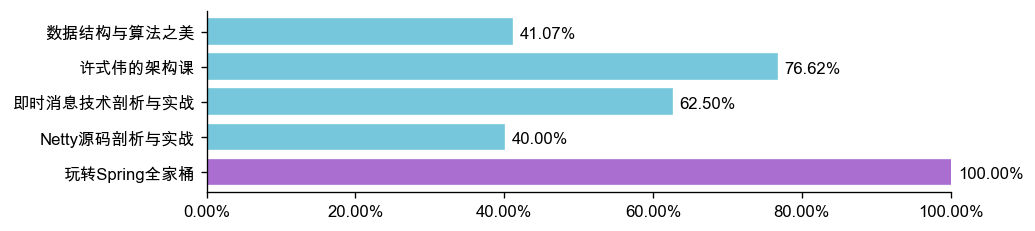

In [189]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def getStudySchedule(d):
    return list(d.values())[-1] * 100

def resetColor(b):
    w = b.get_width()
    if w < 100:
        b.set_color(r'#76C7DB')
    if w >= 100 and w < 200:
        b.set_color(r'#AA6ED0')
    if w >= 200 and w < 300:
        b.set_color(r'#DF29D3')
    if w >= 300:
        b.set_color(r'#CAAE7C')

def resetWidth(b):
    w = b.get_width()
    if w > 100 and w <= 200:
        b.set_width(w - 100)
    if w > 200 and w <= 300:
        b.set_width(w - 200)
    if w > 300:
        b.set_width(w - 300)

fmt='%.2f%%'

y = ['玩转Spring全家桶', 'Netty源码剖析与实战', '即时消息技术剖析与实战', '许式伟的架构课', '数据结构与算法之美']
width = [getStudySchedule(spring),
         getStudySchedule(netty),
         getStudySchedule(im),
         getStudySchedule(construction),
         getStudySchedule(algo)]

plt.figure(num=1, figsize=(8, 2))
bar_list = plt.barh(y, width, height=0.7, color='b')
for bar in bar_list:
    resetColor(bar)
    resetWidth(bar)
    plt.text(bar.get_width()+1,
             bar.get_y()+0.3,
             fmt % bar.get_width(),
             horizontalalignment='left',
             verticalalignment='center',
             weight='bold')

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.xlim(0,100)
plt.rcParams['savefig.dpi'] = 120 #图片像素
plt.rcParams['figure.dpi'] = 120 #分辨率
plt.show()

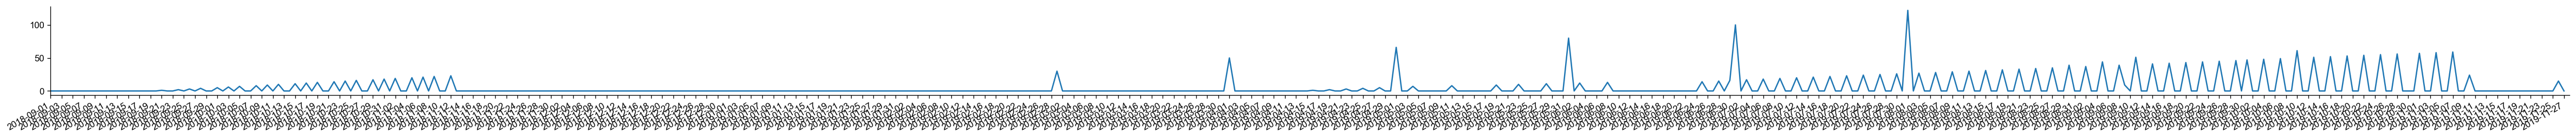

In [188]:
import datetime
 
def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates

def importData(d_source, d_target, total):
    for k, v in d_target.items():
        d_source[k] = d_source[k] + (v * total)
    

date_array = dateRange('2018-09-01', datetime.datetime.today().strftime('%Y-%m-%d'))
date_dict = dict.fromkeys(date_array, 0)
importData(date_dict, spring, sprint_total)
importData(date_dict, netty, netty_total)
importData(date_dict, im, im_total)
importData(date_dict, construction, construction_total)
importData(date_dict, algo, algo_total)

# sum = 0
# for k, v in date_dict.items():
#     sum = sum + v
#     date_dict[k] = sum

plt.figure(num=2, figsize=(50, 2))
plt.plot(list(date_dict.keys()), list(date_dict.values()))

plt.xlim((0,len(list(date_dict.values()))))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.gcf().autofmt_xdate()
plt.xticks([x for x in range(len(list(date_dict.values()))) if x % 2 == 0])

plt.show()

In [161]:
sprint_total = 122
spring = {
    '2019-03-01': 30/sprint_total,
    '2019-04-01': 50/sprint_total,
    '2019-05-01': 60/sprint_total,
    '2019-06-01': 80/sprint_total,
    '2019-07-01': 100/sprint_total,
    '2019-08-01': 122/sprint_total,
}

netty_total = 60
netty = {
    '2019-10-10': 11/netty_total,
    '2019-11-10': 24/netty_total,
}

im_total = 24
im = {
    '2019-08-30': 3/im_total,
    '2019-09-05': 6/im_total,
    '2019-09-09': 9/im_total,
    '2019-09-11': 11/im_total,
    '2019-11-26': 15/im_total,
}

construction_total = 77
construction = {
    '2019-04-16': 1/construction_total,
    '2019-04-19': 2/construction_total,
    '2019-04-22': 3/construction_total,
    '2019-04-25': 4/construction_total,
    '2019-04-28': 5/construction_total,
    '2019-05-01': 6/construction_total,
    '2019-05-04': 7/construction_total,
    '2019-05-11': 8/construction_total,
    '2019-05-19': 9/construction_total,
    '2019-05-23': 10/construction_total,
    '2019-05-28': 11/construction_total,
    '2019-06-03': 12/construction_total,
    '2019-06-08': 13/construction_total,
    '2019-06-25': 14/construction_total,
    '2019-06-28': 15/construction_total,
    '2019-06-30': 16/construction_total,
    '2019-07-03': 17/construction_total,
    '2019-07-06': 18/construction_total,
    '2019-07-09': 19/construction_total,
    '2019-07-12': 20/construction_total,
    '2019-07-15': 21/construction_total,
    '2019-07-18': 22/construction_total,
    '2019-07-21': 23/construction_total,
    '2019-07-24': 24/construction_total,
    '2019-07-27': 25/construction_total,
    '2019-07-30': 26/construction_total,
    '2019-08-03': 27/construction_total,
    '2019-08-06': 28/construction_total,
    '2019-08-09': 29/construction_total,
    '2019-08-12': 30/construction_total,
    '2019-08-15': 31/construction_total,
    '2019-08-18': 32/construction_total,
    '2019-08-21': 33/construction_total,
    '2019-08-24': 34/construction_total,
    '2019-08-27': 35/construction_total,
    '2019-08-30': 36/construction_total,
    '2019-09-02': 37/construction_total,
    '2019-09-05': 38/construction_total,
    '2019-09-08': 39/construction_total,
    '2019-09-11': 40/construction_total,
    '2019-09-14': 41/construction_total,
    '2019-09-17': 42/construction_total,
    '2019-09-20': 43/construction_total,
    '2019-09-23': 44/construction_total,
    '2019-09-26': 45/construction_total,
    '2019-09-29': 46/construction_total,
    '2019-10-01': 47/construction_total,
    '2019-10-04': 48/construction_total,
    '2019-10-07': 49/construction_total,
    '2019-10-10': 50/construction_total,
    '2019-10-13': 51/construction_total,
    '2019-10-16': 52/construction_total,
    '2019-10-19': 53/construction_total,
    '2019-10-22': 54/construction_total,
    '2019-10-25': 55/construction_total,
    '2019-10-28': 56/construction_total,
    '2019-11-01': 57/construction_total,
    '2019-11-04': 58/construction_total,
    '2019-11-07': 59/construction_total,
}

algo_total = 56
algo = {
    '2018-09-21': 1/algo_total,
    '2018-09-24': 2/algo_total,
    '2018-09-26': 3/algo_total,
    '2018-09-28': 4/algo_total,
    '2018-10-01': 5/algo_total,
    '2018-10-03': 6/algo_total,
    '2018-10-05': 7/algo_total,
    '2018-10-08': 8/algo_total,
    '2018-10-10': 9/algo_total,
    '2018-10-12': 10/algo_total,
    '2018-10-15': 11/algo_total,
    '2018-10-17': 12/algo_total,
    '2018-10-19': 13/algo_total,
    '2018-10-22': 14/algo_total,
    '2018-10-24': 15/algo_total,
    '2018-10-26': 16/algo_total,
    '2018-10-29': 17/algo_total,
    '2018-10-31': 18/algo_total,
    '2018-11-02': 19/algo_total,
    '2018-11-05': 20/algo_total,
    '2018-11-07': 21/algo_total,
    '2018-11-09': 22/algo_total,
    '2018-11-12': 23/algo_total,
}